## 1.1 Introduction

The purpose of this project is to develop a predictive model which estimates household energy usage based on factors such as household occupancy, location, and structural features. This step focuses on collecting data, organizing it, and making sure it's well defined.

Per the U.S. Energy Information Administration, 52% of household energy consumption is used for space heating and air conditioning. It should be noted, heating and air conditioning usage vary significantly based on location, home size and structure, and equpment and fuels used. 25% of household energy usage consists of water heating, lighting, and refrigeration (i.e. year round energy use). The remaining 23% consists of devices such as televisions, cooking appliances, washer and dryers, and consumer electronics (i.e. computers, smart phones, video game consoles, streaming devices, etc.).

Therefore, this project is focused on the household energy consumption of space heating and air conditioning and the estimated usage of large appliances.

## 1.2 Objectives

Develop a linear regression model to predict the house hold energy consumption of a home. 

## 1.3 Imports 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## 1.4 Load Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Columns: 759 entries, DOEID to ZLPAMOUNT
dtypes: float64(262), int64(493), object(4)
memory usage: 32.9+ MB
(5686, 759)
energy_usage_data:   (4382, 38)
housing_footage_data:   (4382, 122)
['Year Survey Conducted', '4-digit identification number', 'Census Region', 'Census Division', 'Four Largest States', 'Type of Home  (Respondent answer)', 'Mail Questionnaire Codes', 'The Final Weight', 'Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'Structure originally built as single-family house', 'More like a single-family house or an apartment', "Worry that you wouldn't be able to pay energy bill", 'Reduce basic household expenses', 'Need to borrow to pay energy bill', 'Skip or pay less than whole energy bill', 'Ever been threatened with energy cut off', 'Close off part of home to save energy', 'Keep temperature at an unsafe/unhealthy level', 'Leave home because it w

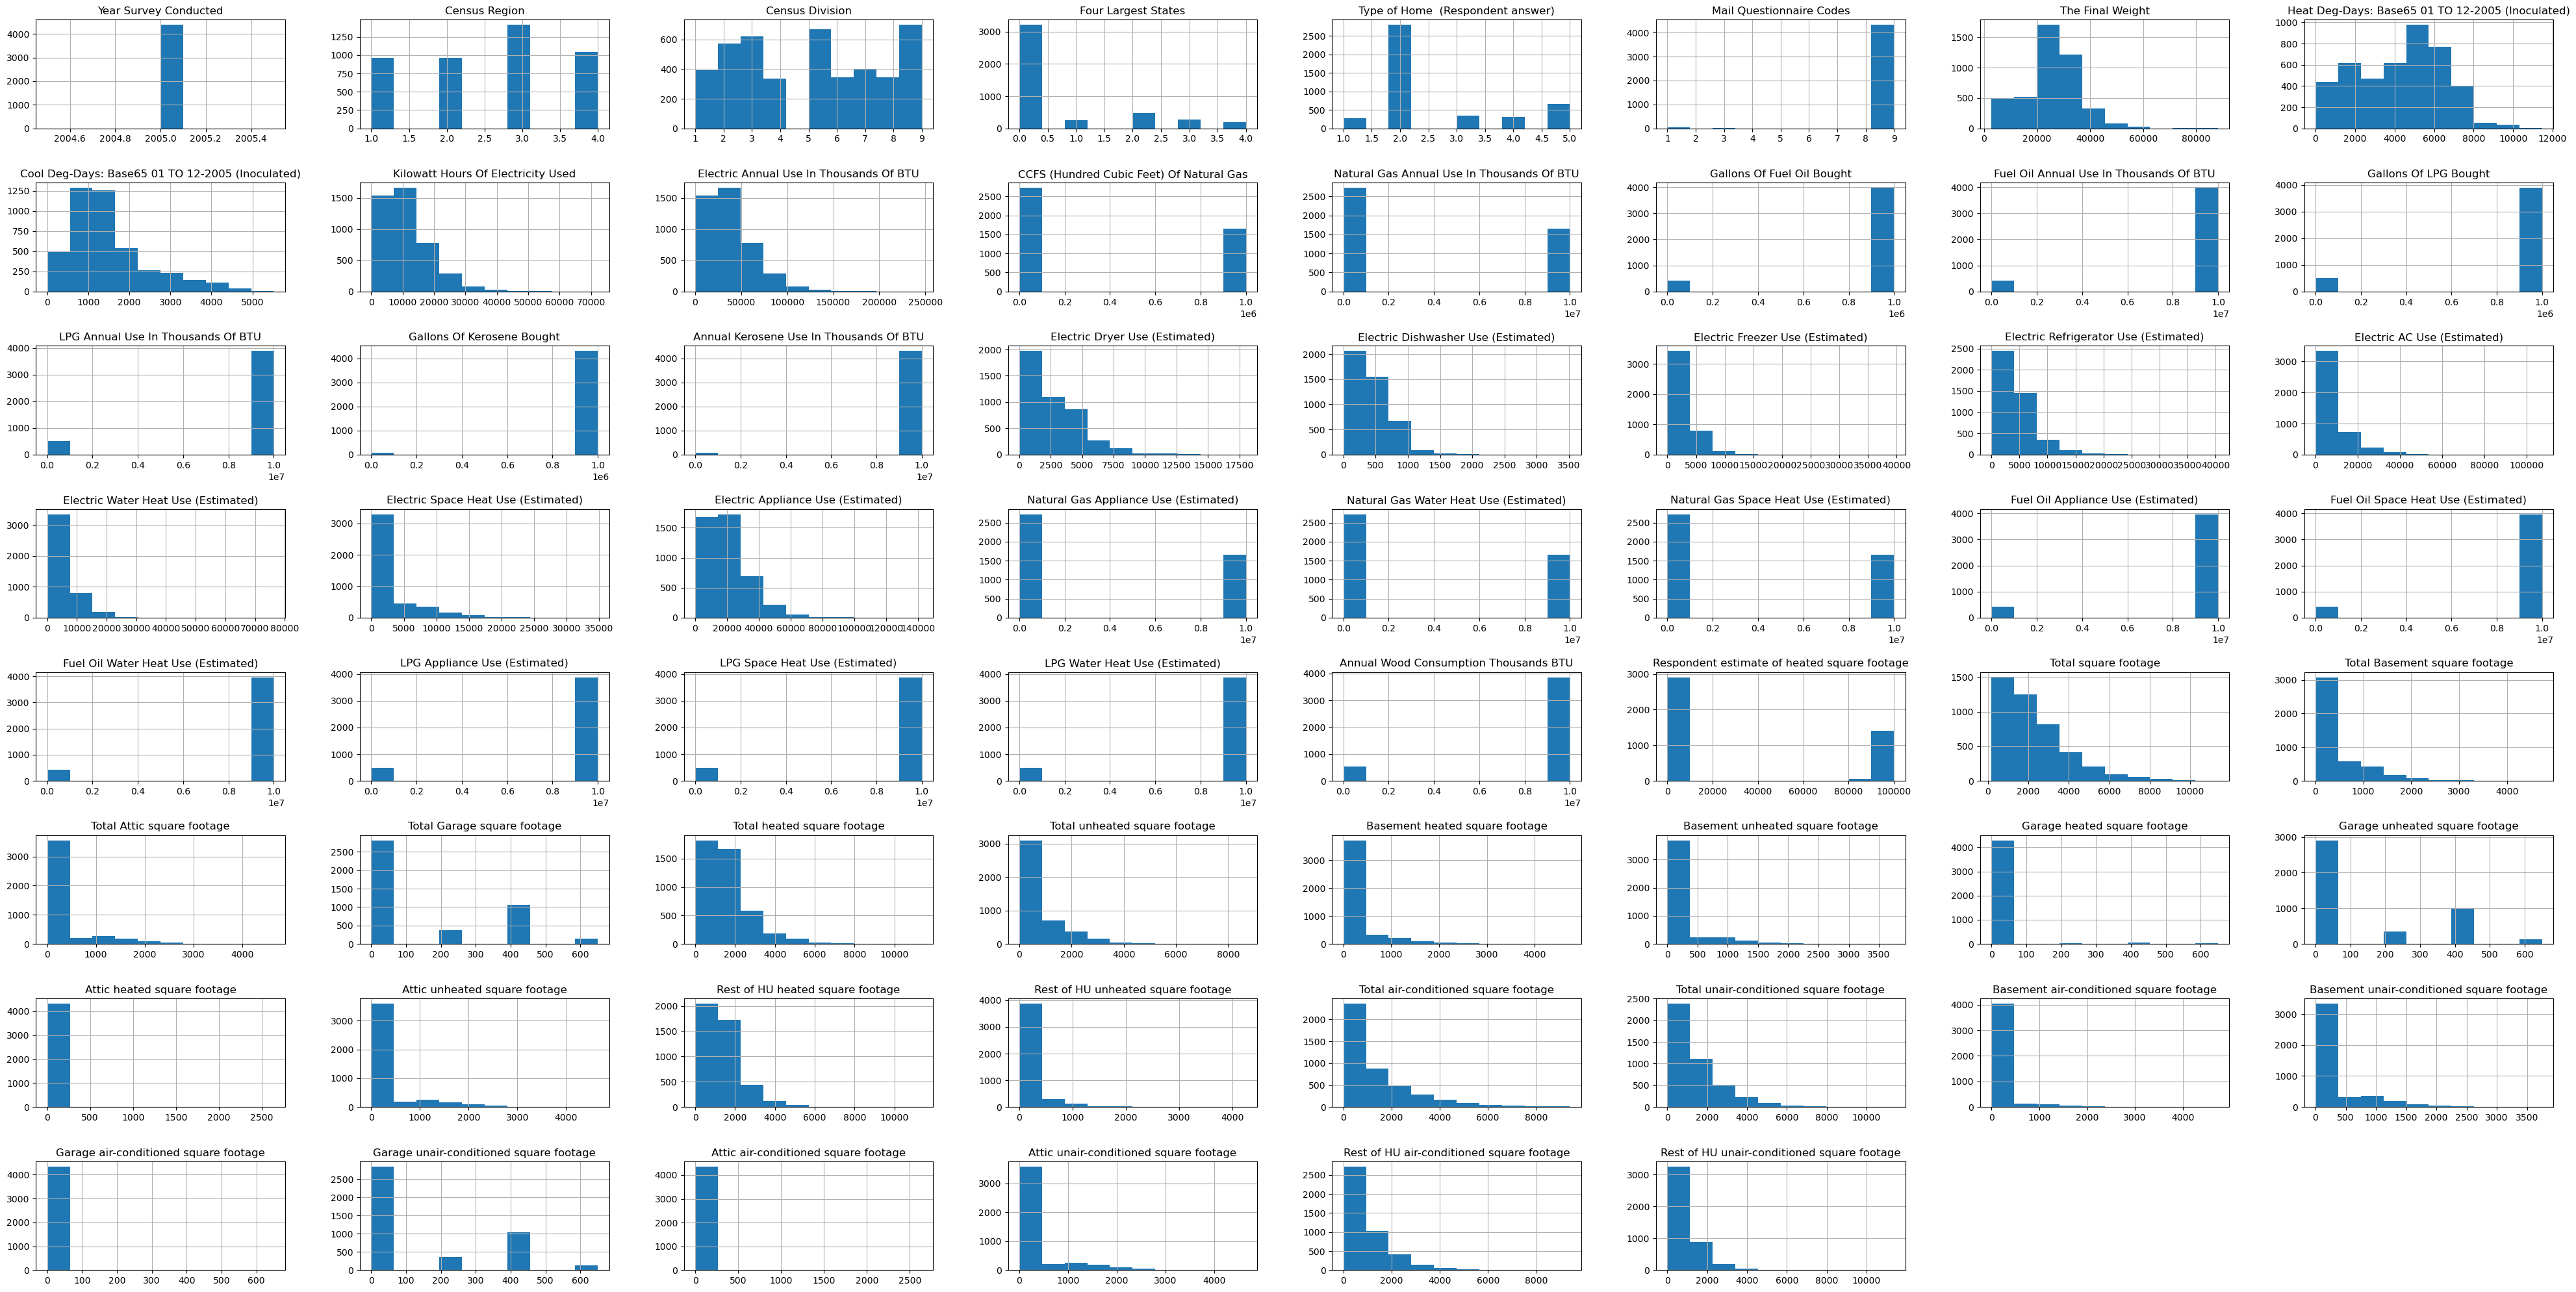

Index(['Total Attic square footage', 'Attic heated square footage',
       'Attic unheated square footage', 'Attic air-conditioned square footage',
       'Attic unair-conditioned square footage'],
      dtype='object')
Empty DataFrame
Columns: [Total Attic square footage, Attic heated square footage, Attic unheated square footage]
Index: []
Index(['Total Basement square footage', 'Basement heated square footage',
       'Basement unheated square footage',
       'Basement air-conditioned square footage',
       'Basement unair-conditioned square footage'],
      dtype='object')
Index(['Total Garage square footage', 'Garage heated square footage',
       'Garage unheated square footage',
       'Garage air-conditioned square footage',
       'Garage unair-conditioned square footage'],
      dtype='object')
Index(['Respondent estimate of heated square footage',
       'Total heated square footage', 'Total unheated square footage',
       'Basement heated square footage', 'Basement unhea

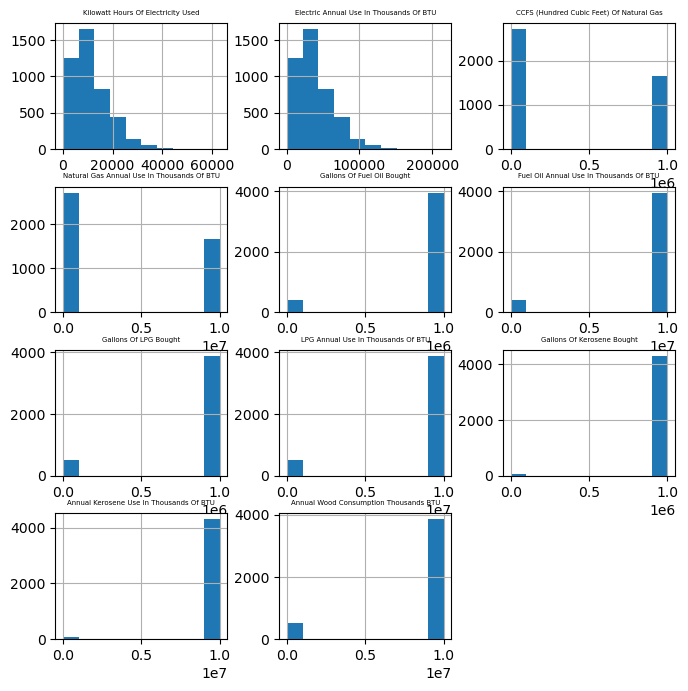

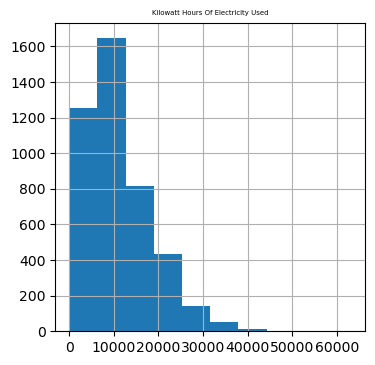

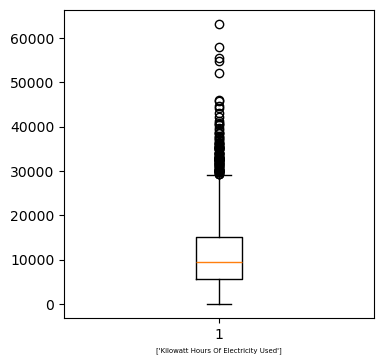

['Electric Annual Use In Thousands Of BTU', 'CCFS (Hundred Cubic Feet) Of Natural Gas', 'Natural Gas Annual Use In Thousands Of BTU', 'Gallons Of Fuel Oil Bought', 'Fuel Oil Annual Use In Thousands Of BTU', 'Gallons Of LPG Bought', 'LPG Annual Use In Thousands Of BTU', 'Gallons Of Kerosene Bought', 'Annual Kerosene Use In Thousands Of BTU', 'Annual Wood Consumption Thousands BTU']
Index(['Census Region', 'Census Division', 'Four Largest States',
       'Type of Home  (Respondent answer)',
       'Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)',
       'Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)',
       'Kilowatt Hours Of Electricity Used',
       'Electric Annual Use In Thousands Of BTU',
       'CCFS (Hundred Cubic Feet) Of Natural Gas',
       'Natural Gas Annual Use In Thousands Of BTU',
       'Gallons Of Fuel Oil Bought', 'Fuel Oil Annual Use In Thousands Of BTU',
       'Gallons Of LPG Bought', 'LPG Annual Use In Thousands Of BTU',
       'Gallons Of Kerosene Bought', 'A

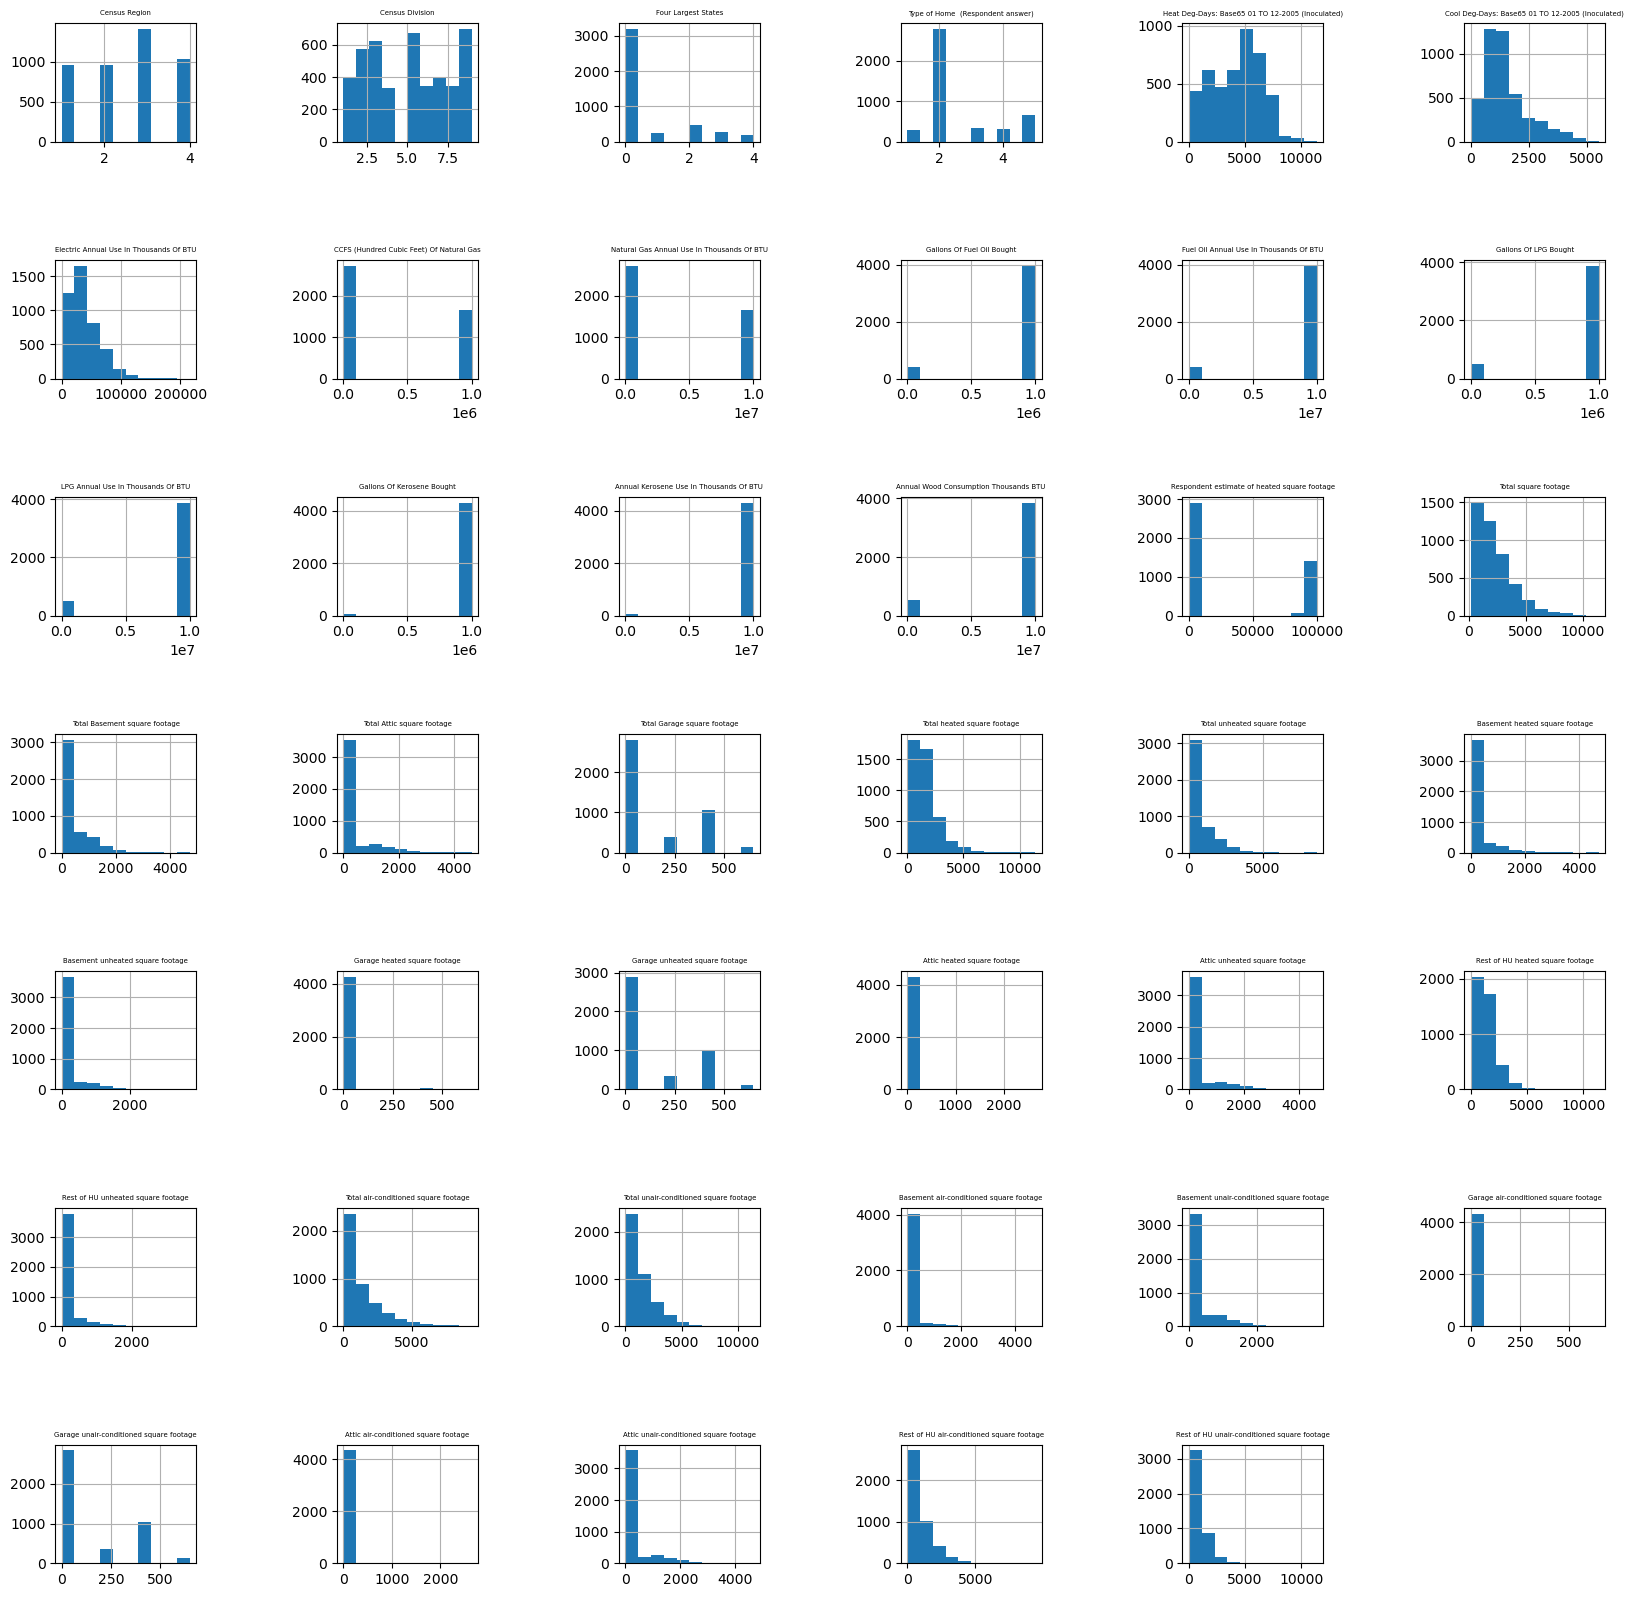

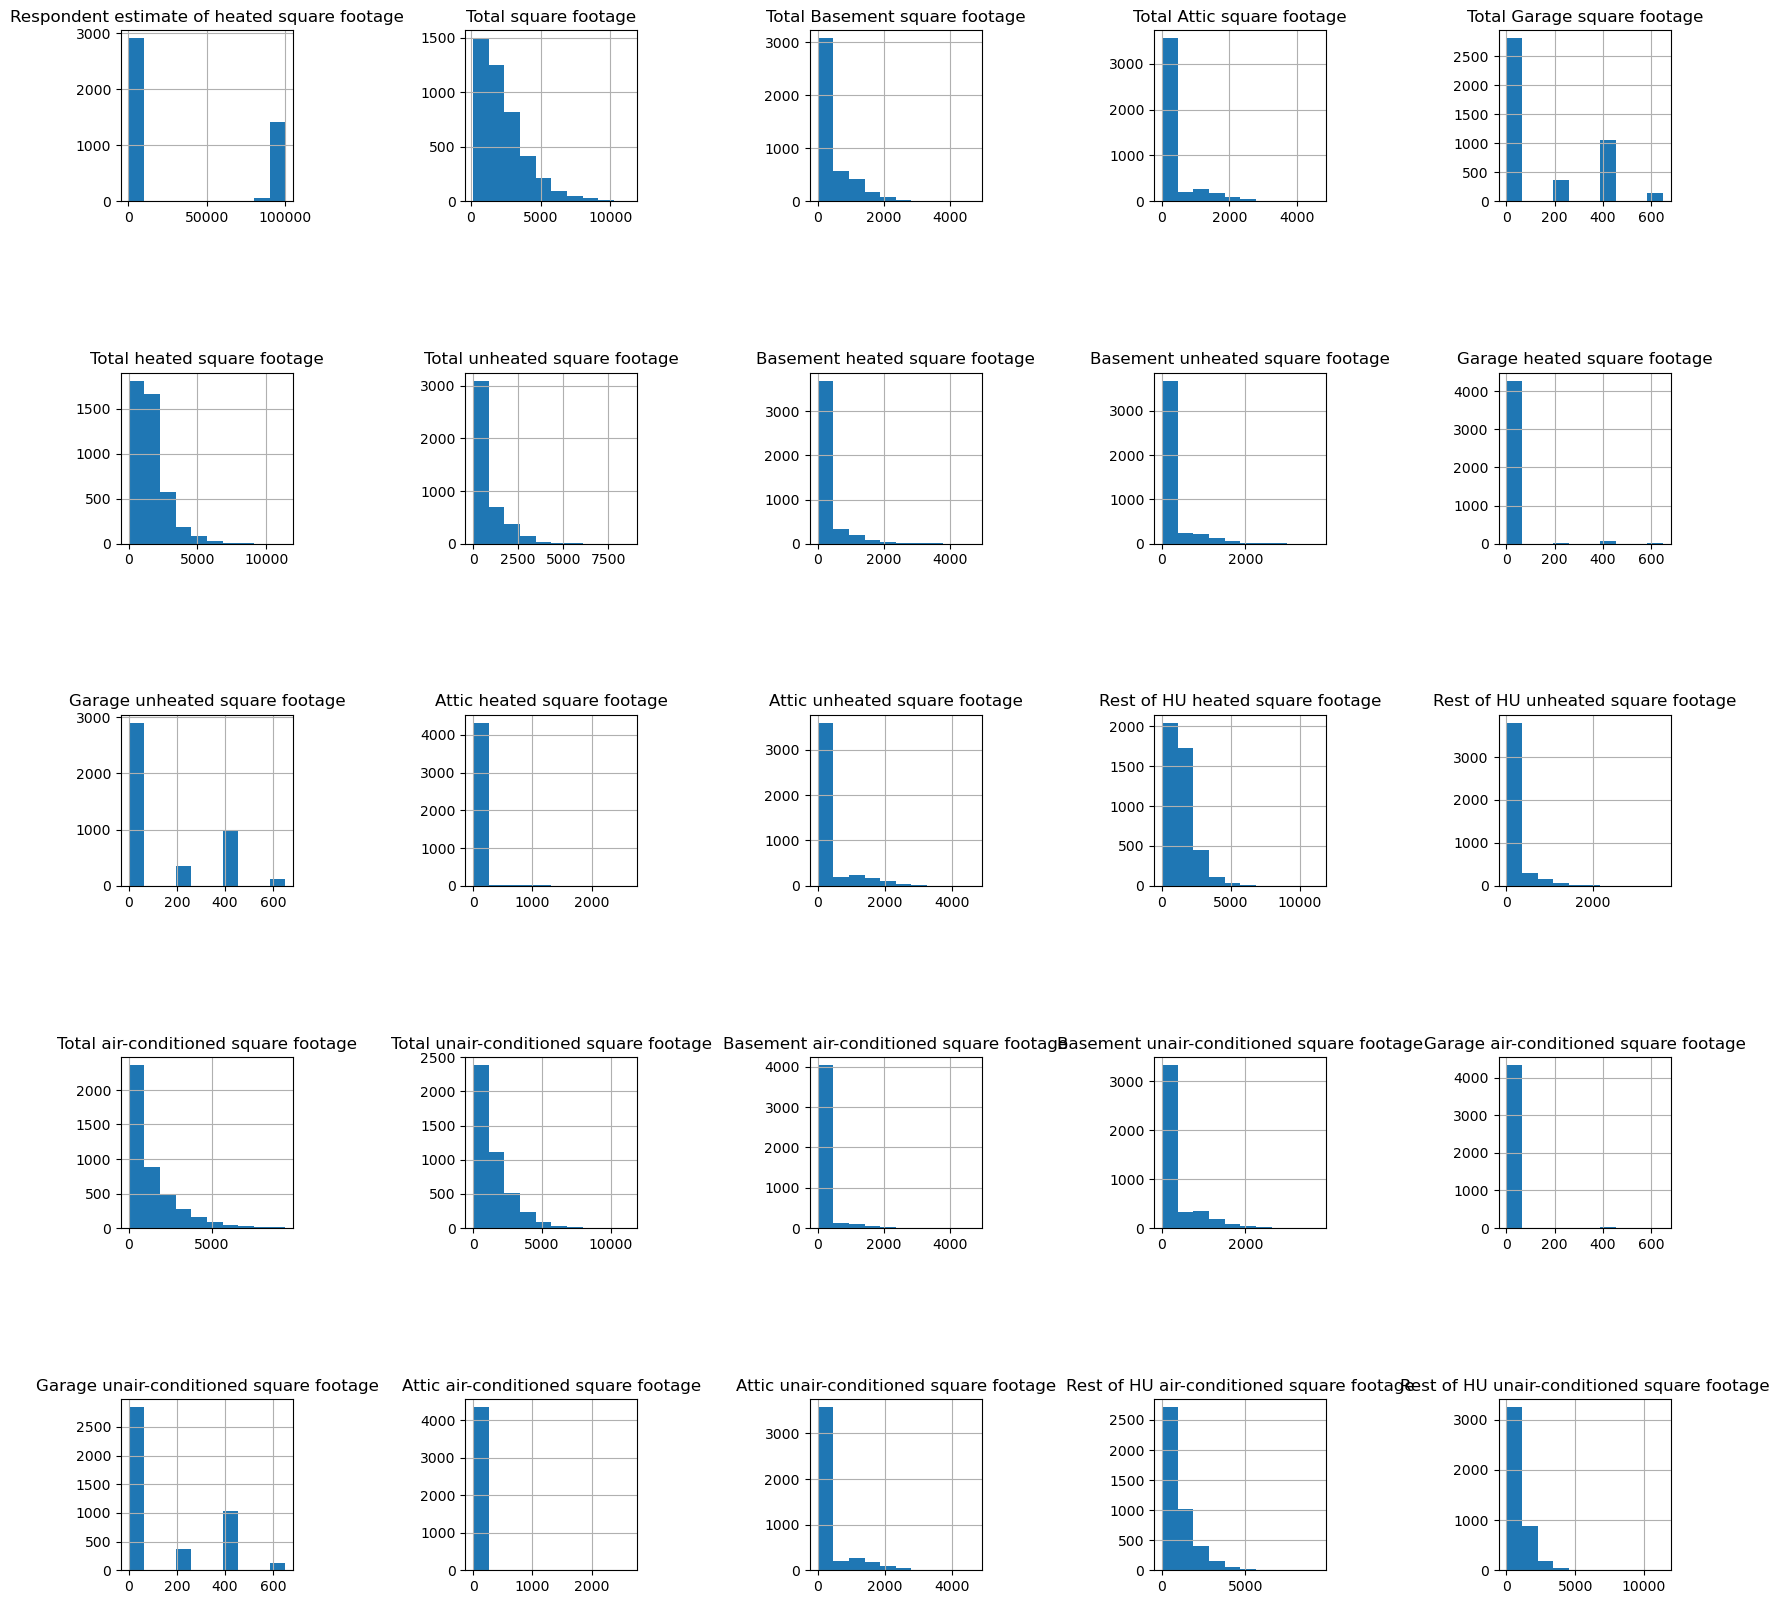

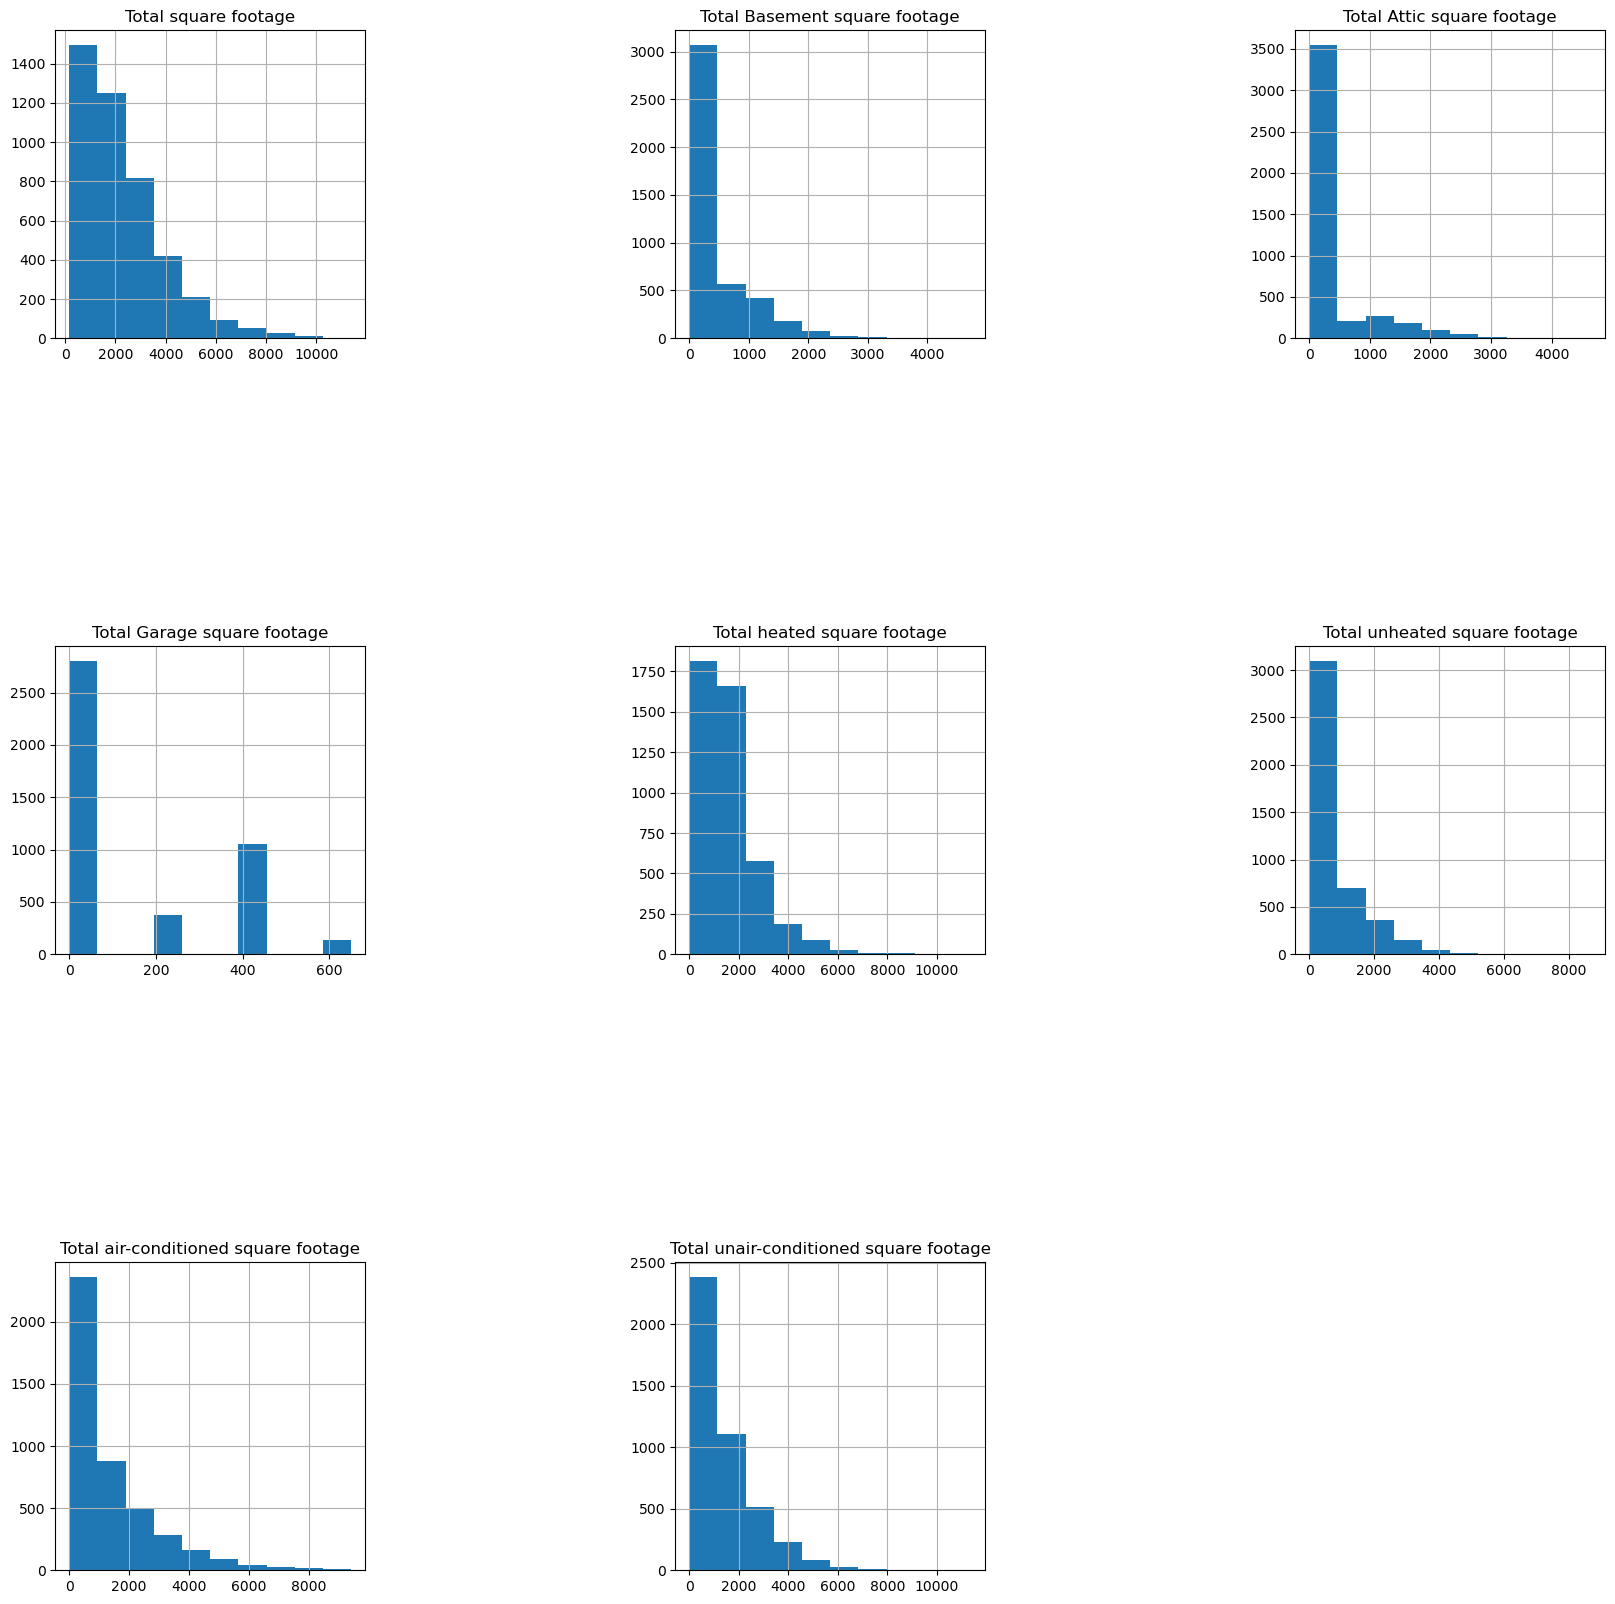

Electric Annual Use In Thousands Of BTU             1.000000
Total square footage                                0.347724
Type of Home  (Respondent answer)                  -0.299862
Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)    0.297658
Natural Gas Annual Use In Thousands Of BTU          0.250646
CCFS (Hundred Cubic Feet) Of Natural Gas            0.250156
Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)   -0.194453
Annual Wood Consumption Thousands BTU              -0.137138
Census Region                                       0.125180
LPG Annual Use In Thousands Of BTU                 -0.104739
Gallons Of LPG Bought                              -0.104648
Fuel Oil Annual Use In Thousands Of BTU             0.101150
Gallons Of Fuel Oil Bought                          0.101084
Census Division                                     0.093815
Four Largest States                                 0.050528
Annual Kerosene Use In Thousands Of BTU            -0.014297
Gallons Of Kerosene Boug

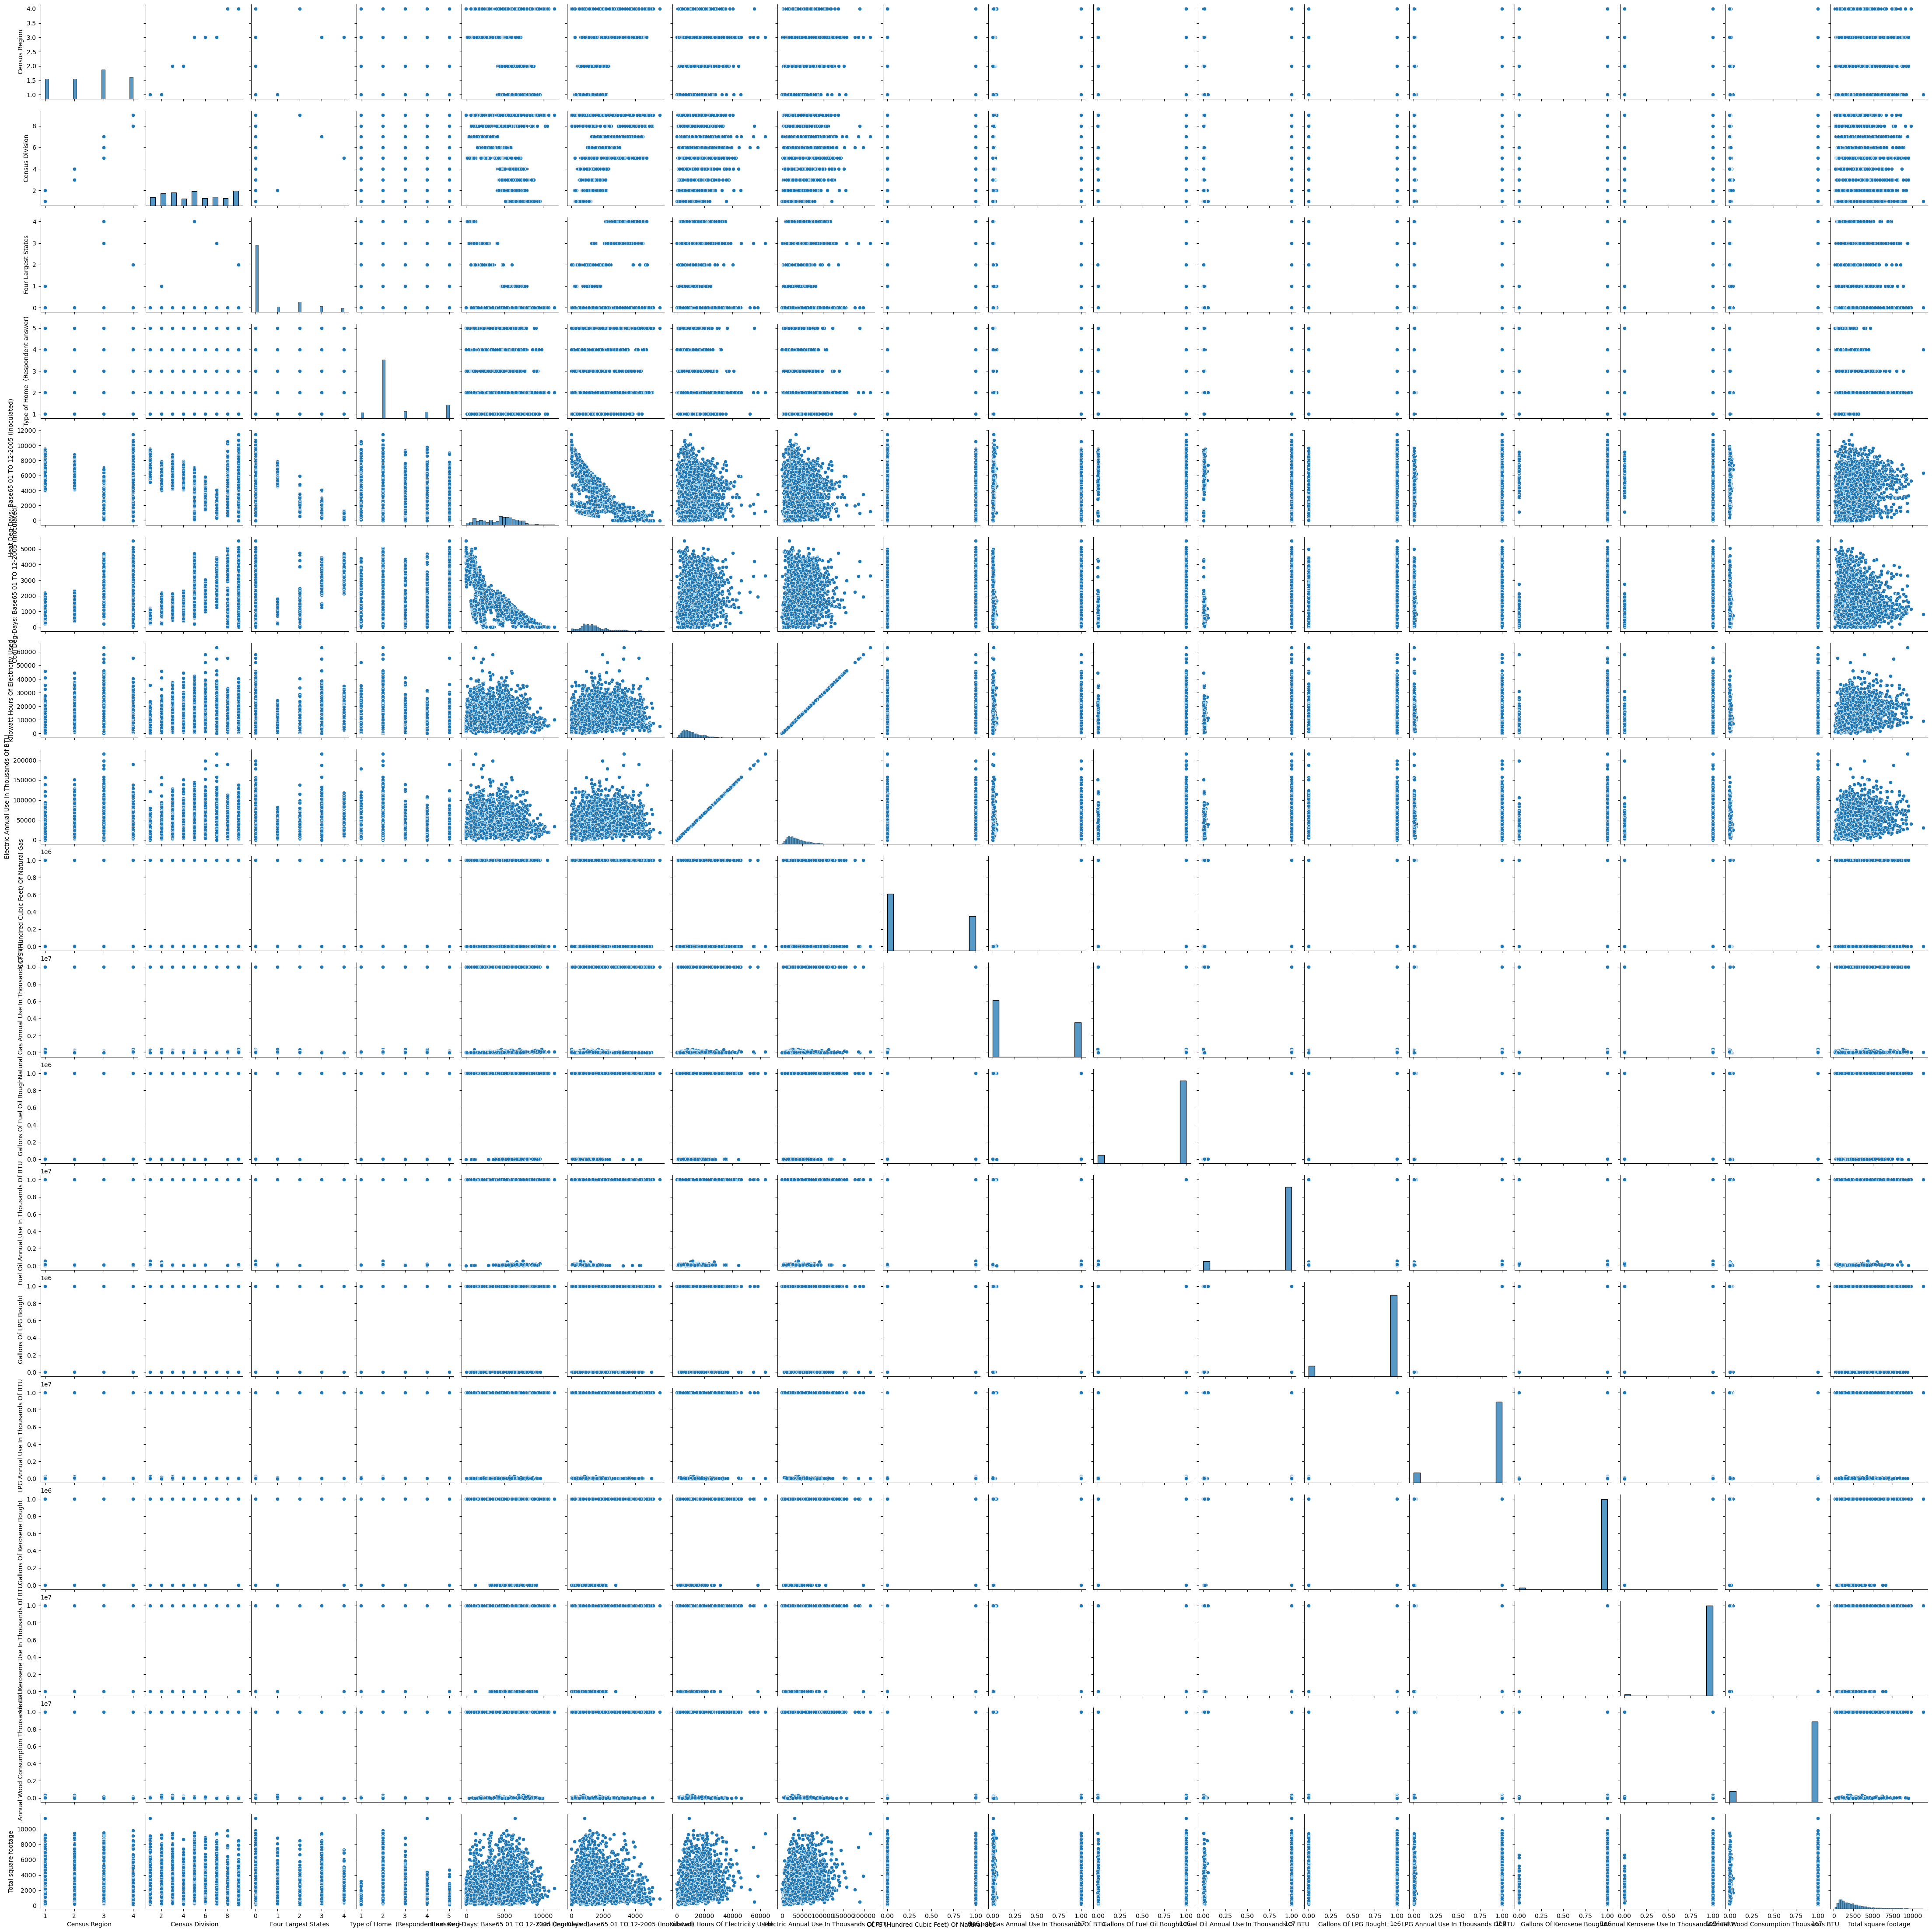

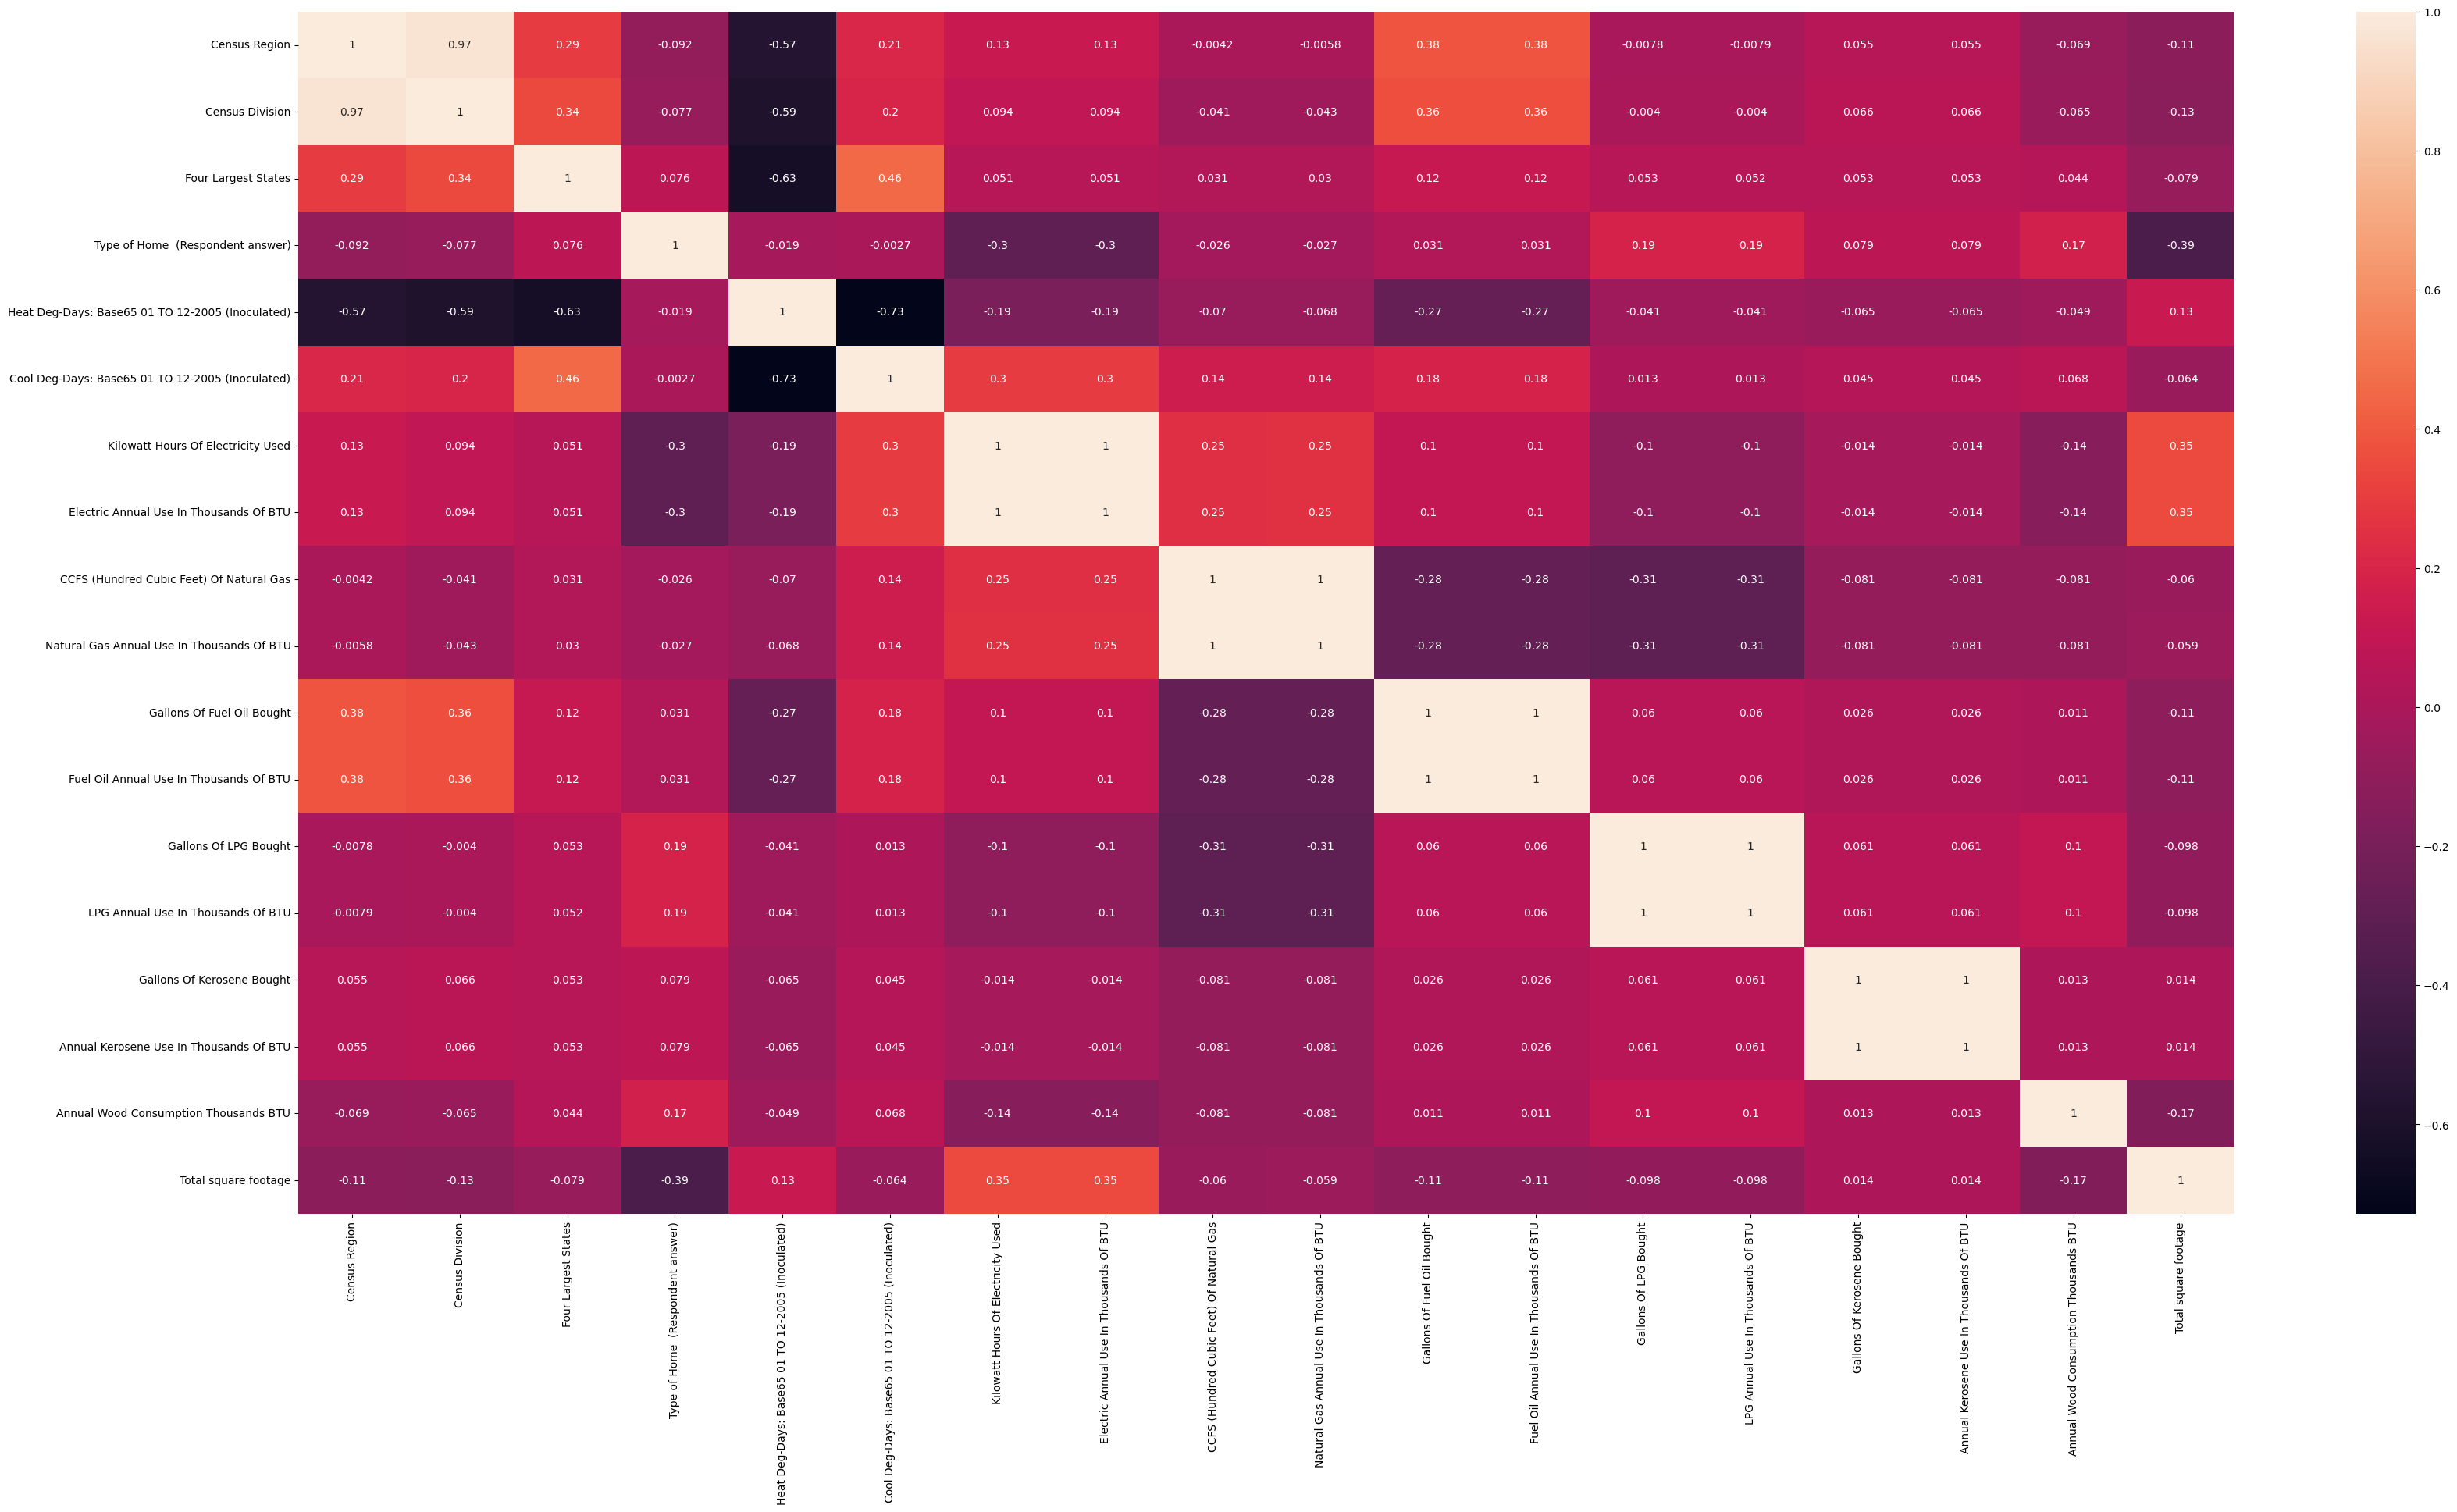

In [8]:
%run 04_Pre-processing&TrainingData.ipynb

In [9]:
#Drop Electric Annual Use In Thousands Of BTU column. This is an estimation of what we are looking to solve. 
X_train.drop(columns = 'Electric Annual Use In Thousands Of BTU', inplace = True)
X_test.drop(columns = 'Electric Annual Use In Thousands Of BTU', inplace = True)

In [10]:
#Remove the extra space spaces within the column names
X_train.columns = X_train.columns.str.replace('  ', ' ')
X_test.columns = X_test.columns.str.replace('  ', ' ')

## 2.1 Linear Regression Model 

Sklearn has a LinearRegression() function built into the linear_model module. We'll be using that to make our regression model.

In [13]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression()

In [14]:
# We now want to train the model on our test data.
rModel_results = rModel.fit(X_train, y_train)

In [15]:
# Evaluate the model  
print(rModel.score(X_train, y_train))

0.3607398827934828


The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. 

This model explains approximately 36% of the variation from the mean. 

In [17]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

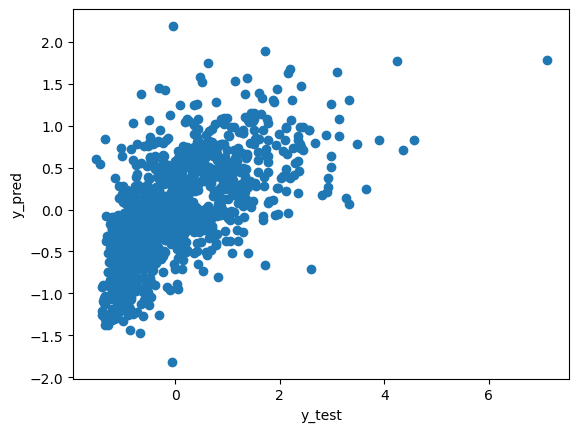

In [18]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

The scatterplt represents how well the predictions match the actual results. 

Along the x-axis, we have the actual (scaled) energy consumption, and along the y-axis we have the predicted value. 

There is a visible positive correlation, as the model has not been totally unsuccesful, but it's clear that it is not maximally accurate.

Let's build a similar model using a different package, to see if we get a better result that way.

## 2.2 Linear Regression Model - Ordinary Least Squares 

In [21]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [22]:
# Evaluate the model with .summary()
sum_rModel2 = rModel2_results.summary() 

In [23]:
sum_rModel2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Kilowatt Hours Of Electricity Used   R-squared:                       0.361
Model:                                            OLS   Adj. R-squared:                  0.355
Method:                                 Least Squares   F-statistic:                     65.46
Date:                                Sat, 22 Mar 2025   Prob (F-statistic):          4.34e-290
Time:                                        15:10:06   Log-Likelihood:                -3888.9
No. Observations:                                3277   AIC:                             7836.
Df Residuals:                                    3248   BIC:                             8013.
Df Model:                                          28                                         
Covariance Type:                            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       -0.0099      0.014     -0.709      0.479      -0.037       0.017
Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)                            -0.0287      0.043     -0.670      0.503      -0.113       0.055
Cool Deg-Days: Base65 01 TO 12-2005 (Inoculated)                             0.1481      0.034      4.354      0.000       0.081       0.215
CCFS (Hundred Cubic Feet) Of Natural Gas                                     0.2127      2.322      0.092      0.927      -4.339       4.765
Natural Gas Annual Use In Thousands Of BTU                                   0.0139      2.319      0.006      0.995      -4.533       4.561
Gallons Of Fuel Oil Bought                                                   2.5366      2.656      0.955      0.340      -2.671       7.744
Fuel Oil Annual Use In Thousands Of BTU                                     -2.4357      2.654     -0.918      0.359      -7.640       2.768
Gallons Of LPG Bought                                                       10.9827      4.219      2.603      0.009       2.711      19.255
LPG Annual Use In Thousands Of BTU                                         -10.9477      4.218     -2.595      0.009     -19.218      -2.677
Gallons Of Kerosene Bought                                                  32.9196     16.575      1.986      0.047       0.421      65.419
Annual Kerosene Use In Thousands Of BTU                                    -32.9150     16.574     -1.986      0.047     -65.412      -0.418
Annual Wood Consumption Thousands BTU                                       -0.0422      0.014     -2.943      0.003      -0.070      -0.014
Total square footage                                                         0.3049      0.017     17.584      0.000       0.271       0.339
Census Region_MIDWEST                                                       -0.0070      0.007     -0.955      0.340      -0.022       0.007
Census Region_NORTHEAST                                                     -0.0565      0.008     -6.755      0.000      -0.073      -0.040
Census Region_SOUTH                                                          0.0583      0.009      6.618      0.000       0.041       0.076
Census Region_WEST                                                          -0.0022      0.008     -0.259      0.796      -0.019       0.014
Census Division_EAST NORTH CENTRAL                                          -0.0261    

The R-squared score is 0.361, the same as what it was with the previous model. It's the same value as the score from sklearn, because they've both used the same algorithm on the same data.

When the p value is > 0.05 the significance level is < 0.05, significance level + p_value =1 so it means if high p_value less significance of the variable hence we delete that variable. The columns with p_values greater than 0.05 are removed. 

In [25]:
#Create a copy of the X data sets to remove columns from. 
X_train2 = X_train.copy(deep=True)
X_test2 = X_test.copy(deep=True)

In [26]:
#review P_value results 
results_as_html = sum_rModel2.tables[1].as_html()
results_rModel = pd.read_html(results_as_html, header=0, index_col=0)[0]

print(pd.DataFrame(results_rModel['P>|t|'].sort_values(ascending = False)))

                                                    P>|t|
Natural Gas Annual Use In Thousands Of BTU          0.995
CCFS (Hundred Cubic Feet) Of Natural Gas            0.927
Four Largest States_NEW YORK STATE                  0.891
Census Region_WEST                                  0.796
Census Division_WEST SOUTH CENTRAL                  0.557
Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)    0.503
const                                               0.479
Census Division_MIDDLE ATLANTIC                     0.449
Four Largest States_FLORIDA                         0.446
Fuel Oil Annual Use In Thousands Of BTU             0.359
Census Division_PACIFIC                             0.354
Census Region_MIDWEST                               0.340
Gallons Of Fuel Oil Bought                          0.340
Type of Home (Respondent answer)_SINGLE-FAMILY ...  0.261
Type of Home (Respondent answer)_APARTMENT BUIL...  0.113
Census Division_MOUNTAIN                            0.089
Annual Kerosen

In [27]:
#create a fuction to repeat the removal of columns 

def pvalue_removal(sum_rModel2, min_pvalue):
    results_as_html = sum_rModel2.tables[1].as_html()
    results_rModel = pd.read_html(results_as_html, header=0, index_col=0)[0]

    delete = []
    delete = pd.DataFrame(results_rModel['P>|t|'].loc[(results_rModel['P>|t|'] > min_pvalue)]).index.tolist()

    X_train2.drop(columns = delete, inplace = True)
    X_test2.drop(columns = delete, inplace = True)
    
    # Create the model
    rModel2 = sm.OLS(y_train, X_train2)

    # Fit the model with fit() 
    rModel_results = rModel2.fit()

    # Evaluate the model with .summary()
    sum_rModel2 = rModel_results.summary() 

    print(sum_rModel2)
    print(pd.DataFrame(results_rModel['P>|t|'].sort_values(ascending = False)))

In [28]:
delete = ['Natural Gas Annual Use In Thousands Of BTU', 'CCFS (Hundred Cubic Feet) Of Natural Gas', 
          'Four Largest States_NEW YORK STATE', 'Census Region_WEST', 'Census Division_WEST SOUTH CENTRAL',
          'Heat Deg-Days: Base65 01 TO 12-2005 (Inoculated)', 'const', 'Census Division_MIDDLE ATLANTIC',
          'Four Largest States_FLORIDA', 'Fuel Oil Annual Use In Thousands Of BTU', 'Census Division_PACIFIC', 
          'Census Region_MIDWEST', 'Gallons Of Fuel Oil Bought', 
          'Type of Home (Respondent answer)_SINGLE-FAMILY ATTACHED HOUSE', 
          'Type of Home (Respondent answer)_APARTMENT BUILDING WITH 2-4 UNITS']

In [29]:
X_train2.drop(columns = delete, inplace = True)
X_test2.drop(columns = delete, inplace = True)

In [30]:
# Create the model
rModel3 = sm.OLS(y_train, X_train2)

# Fit the model with fit() 
rModel_results3 = rModel3.fit()

# Evaluate the model with .summary()
sum_rModel3 = rModel_results3.summary() 

results_as_html = sum_rModel3.tables[1].as_html()
results_rModel3 = pd.read_html(results_as_html, header=0, index_col=0)[0]

print(sum_rModel3)
print(pd.DataFrame(results_rModel3['P>|t|'].sort_values(ascending = False)))

                                         OLS Regression Results                                        
Dep. Variable:     Kilowatt Hours Of Electricity Used   R-squared (uncentered):                   0.326
Model:                                            OLS   Adj. R-squared (uncentered):              0.322
Method:                                 Least Squares   F-statistic:                              75.16
Date:                                Sat, 22 Mar 2025   Prob (F-statistic):                   2.46e-260
Time:                                        15:10:08   Log-Likelihood:                         -3974.4
No. Observations:                                3277   AIC:                                      7991.
Df Residuals:                                    3256   BIC:                                      8119.
Df Model:                                          21                                                  
Covariance Type:                            nonrobust           

In [31]:
delete = ['Census Region_SOUTH', 'Gallons Of LPG Bought', 'LPG Annual Use In Thousands Of BTU',
          'Gallons Of Kerosene Bought', 'Annual Kerosene Use In Thousands Of BTU', 'Census Division_WEST NORTH CENTRAL']

In [32]:
X_train2.drop(columns = delete, inplace = True)
X_test2.drop(columns = delete, inplace = True)

In [33]:
# Create the model
rModel4 = sm.OLS(y_train, X_train2)

# Fit the model with fit() 
rModel_results4 = rModel4.fit()

# Evaluate the model with .summary()
sum_rModel4 = rModel_results4.summary() 

results_as_html = sum_rModel4.tables[1].as_html()
results_rModel4 = pd.read_html(results_as_html, header=0, index_col=0)[0]

print(sum_rModel4)
print(pd.DataFrame(results_rModel4['P>|t|'].sort_values(ascending = False)))

                                         OLS Regression Results                                        
Dep. Variable:     Kilowatt Hours Of Electricity Used   R-squared (uncentered):                   0.325
Model:                                            OLS   Adj. R-squared (uncentered):              0.322
Method:                                 Least Squares   F-statistic:                              104.6
Date:                                Sat, 22 Mar 2025   Prob (F-statistic):                   1.90e-264
Time:                                        15:10:08   Log-Likelihood:                         -3978.6
No. Observations:                                3277   AIC:                                      7987.
Df Residuals:                                    3262   BIC:                                      8079.
Df Model:                                          15                                                  
Covariance Type:                            nonrobust           

The R-Squared score is 0.325. This is less than the previous model.

Text(0, 0.5, 'y predict')

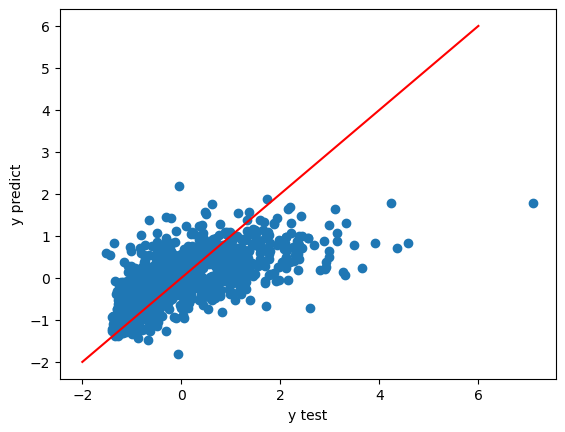

In [35]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(-2,7)],[x for x in range(-2,7)], color='red')

# Label it nicely
plt.xlabel('y test')
plt.ylabel("y predict")

The red line shows a theoretically perfect correlation between our actual and predicted values - the line that would exist if every prediction was completely correct. It's clear that while our points have a generally similar direction, they don't match the red line at all; we still have more work to do.

## 3.1 Random Forest Model 

Random Forest is an ensemble of Decision Trees. With a few exceptions, a RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. 

Imports:

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

Random Festest Classifier does not accept continuous inputs. Therefore, convert data type from float to integer. 

In [84]:
y_train2 = y_train.astype(int)
y_test2 = y_test.astype(int)

X_train2 = X_train.astype(int)
X_test2 = X_test.astype(int)

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train2, y_train2.values.ravel())
y_pred = model_res.predict(X_test2)
y_pred_prob = model_res.predict_proba(X_test2)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test2, y_pred)

f1 = f1_score(y_test2, y_pred, average='weighted')
cm = confusion_matrix(y_test2, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.702
Random Forest: f1-score=0.653


The random forest model shows an accurary of approximately 70%. This is an improvement over the linear regression model. 

Text(0, 0.5, 'y predict')

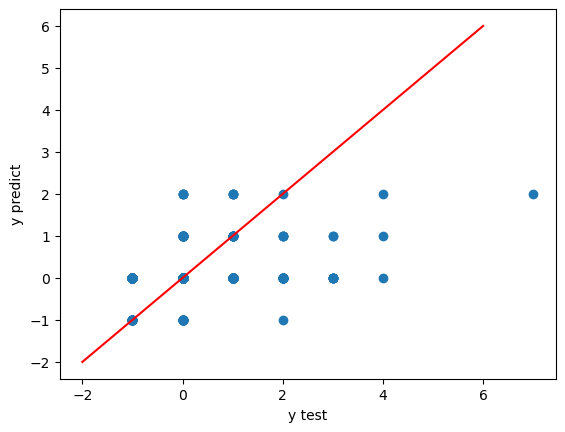

In [96]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test2, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(-2,7)],[x for x in range(-2,7)], color='red')

# Label it nicely
plt.xlabel('y test')
plt.ylabel("y predict")

## 4.1 Decision Tree - Entropy Model 

Entropy is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The Information gain of a specific feature with a threshold is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold.

In [142]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  

In [144]:
%pip install pydotplus


     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 131.3 kB/s eta 0:00:02
     ---- -------------------------------- 30.7/278.7 kB 163.8 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/278.7 kB 178.6 kB/s eta 0:00:02
     --------- --------------------------- 71.7/278.7 kB 262.6 kB/s eta 0:00:01
     ------------------- ---------------- 153.6/278.7 kB 510.2 kB/s eta 0:00:01
     --------------------------------- -- 256.0/278.7 kB 785.2 kB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 780.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=e2c0887a8725046460c413c94

In [148]:
%pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 165.2 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 187.9 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 245.8 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 236.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [172]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion = 'entropy',  max_depth = 3, random_state = 1234)

# Call fit() on entr_model
entr_model.fit(X_train2, y_train2) 

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test2)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred) 

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

In [121]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.6825251601097896
Balanced accuracy: 0.18970639918901178


C:\Users\Michelle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


## 5.1 Results 

The Random forest model best predicts the energy uses of the homes, resulting in an accuracy of approximately 70%. The random forest model will be used to best represent the data. 